# Gaussian bayes classifier

#### Utilizing a Gaussian bayes classfier to classify data points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report
from matplotlib import cm

#### Load training data

The $\texttt{class1_train}$, $\texttt{class2_train}$ data provided for task has 2D features $x1, x2$.

In [2]:
class1_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class1_train').to_numpy()
class2_train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/class2_train').to_numpy()

#### Visualizing training data
Generating 2D scatter plot of the training data, The points from class 1 in red and the points from class 2 in blue.

In [3]:
#print(class1_train, class2_train)

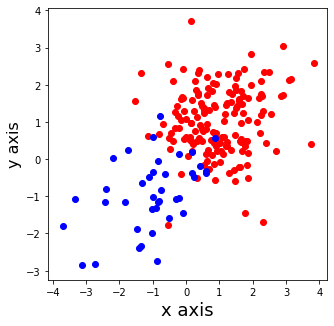

In [4]:
fig=plt.figure(figsize=(5,5))
x1, y1=class1_train[:,0], class1_train[:,1]
x2, y2= class2_train[:,0], class2_train[:,1]
plt.scatter(x1, y1, color = 'r', label = 'Class 1')
plt.scatter(x2, y2, color = 'b', label = 'Class 2')
plt.xlabel('x axis', fontsize=18)
plt.ylabel('y axis', fontsize=16)
plt.show()

### Maximum likelihood estimate of parameters calculation

We will model the likelihood, $P(\mathbf{x}|C_1)$ and $P(\mathbf{x}|C_2)$ as $\mathcal{N}(\mathbf{\mu_1},|\Sigma_1)$ and $\mathcal{N}(\mathbf{\mu_2},|\Sigma_2)$ respectively. The prior probability of the classes are called, $P(C_1)=\pi_1$ and $P(C_2)=\pi_2$.

The maximum likelihood estimate of the parameters as follows:
\begin{align*}
\pi_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)}{N}\\
\mathbf{\mu_k} &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)\mathbf{x}^i}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\Sigma_k &= \frac{\sum_{i=1}^N \mathbb{1}(t^i=k)(\mathbf{x}^i-\mathbf{\mu_k})(\mathbf{x}^i-\mathbf{\mu_k})^T}{\sum_{i=1}^N \mathbb{1}(t^i=k)}\\
\end{align*}

Here, $t^i$ is the target or class of $i^{th}$ sample. $\mathbb{1}(t^i=k)$ is 1 if $t^i=k$ and 0 otherwise.

Computing maximum likelihood values estimates of $\pi_1$, $\mu_1$, $\Sigma_1$ and $\pi_2$, $\mu_2$, $\Sigma_2$ 


In [5]:
#counting number of data points of each class
num1 = class1_train.shape[0]
num2 =  class2_train.shape[0]

#calculating probabilities of each class
prob1, prob2 = num1/(num1+num2), num2/(num1+num2)

#calculating mean location of data of each class
mean1, mean2= np.mean(class1_train,axis=0),np.mean(class2_train,axis=0) 

#creating mean matrix of same shape as data matrix of each class
matrix1, matrix2=np.ones((num1,2)), np.ones((num2,2))
mean1_mat, mean2_mat=[mean1]*num1, [mean2]*num2

# calculating variance matrix
X1, X2 = (class1_train-mean1_mat),(class2_train-mean2_mat) # data matrix -mean matrix
Xt1, Xt2= np.transpose(X1), np.transpose(X2) #transpose of above matrices

m1, m2= np.matmul(Xt1,X1), np.matmul(Xt2,X2) # matrix product for sum of square(difference)

var1= (m1)/num1 #variance
var2= (m2)/num2

print("pi1", prob1,'\n mu1:',mean1,'\n sigma1',var1 )
print("pi2", prob2,'\n mu1:',mean2,'\n sigma1',var2 )


pi1 0.8040201005025126 
 mu1: [0.96998989 1.02894917] 
 sigma1 [[0.95527085 0.07775973]
 [0.07775973 0.81591945]]
pi2 0.19597989949748743 
 mu1: [-1.02482819 -0.91492055] 
 sigma1 [[1.16715324 0.46947177]
 [0.46947177 0.91362912]]


pi1 0.8040201005025126 
 mu1: [0.96998989 1.02894917] 
 sigma1 [[0.95527085 0.07775973]
 [0.07775973 0.81591945]]
pi2 0.19597989949748743 
 mu1: [-1.02482819 -0.91492055] 
 sigma1 [[1.16715324 0.46947177]
 [0.46947177 0.91362912]]

#### Visualizing the likelihood


X,y shape: (500, 500) (500, 500)
Dimension: (500, 500, 2)


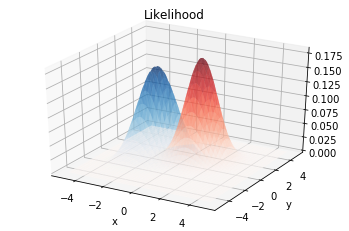

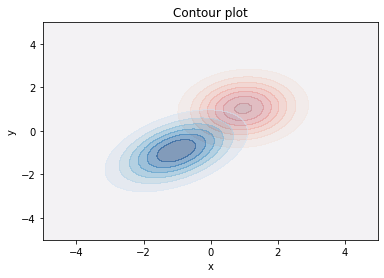

In [6]:
from mpl_toolkits import mplot3d
x, y = np.mgrid[-5:5:.02, -5:5:.02] #creates empty mesh grid
print("X,y shape:",x.shape, y.shape)

p = np.empty(x.shape + (2,))  #2 is added for defining z axis

print('Dimension:',p.shape)
p[:, :, 0] = x # z axis value zero/ xy plane 
p[:, :, 1] = y # z axis value 1 
# print(p[:, :, 0])

# create array of multivatiate normal values with previous calculated mean and variance
rv1 = multivariate_normal(mean = mean1, cov = var1) 
rv2 = multivariate_normal(mean = mean2, cov = var2)

# plt.plot(x,y,likelihood1.pdf(pos), coo = 'red')
likelihood1 = rv1.pdf(p) #probability density function of multivariate normal function
likelihood2 = rv2.pdf(p)

ax=plt.subplot( projection='3d') 
plt.title('Likelihood')
ax.plot_surface(x,y,likelihood1, cmap='Reds', alpha = 0.5) # alpha is transparency
ax.plot_surface(x,y,likelihood2, cmap='Blues', alpha = 0.5)
ax.set(xlabel='x',ylabel='y')
plt.show()

plt.title('Contour plot')
plt.contourf(x, y, likelihood1, cmap='Reds', alpha = 0.5)
plt.contourf(x, y, likelihood2, cmap='Blues', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Visualizing the posterior


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

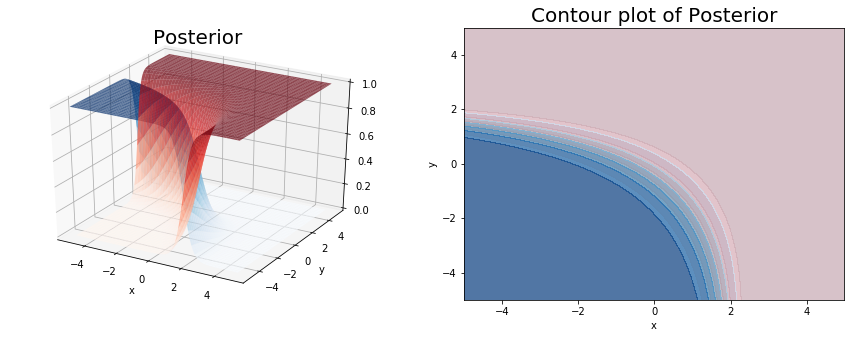

In [7]:
posterior1 = likelihood1*prob1/(likelihood1*prob1+likelihood2*prob2)
posterior2 = likelihood2*prob2/(likelihood1*prob1+likelihood2*prob2)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection='3d')
plt.title('Posterior', fontsize=20)
ax.plot_surface(x,y,posterior1, cmap='Reds', alpha = 0.7)
ax.plot_surface(x,y,posterior2, cmap='Blues', alpha = 0.7)
ax.set(xlabel='x', ylabel='y')

ax=plt.subplot(122)
plt.title('Contour plot of Posterior', fontsize=20)
plt.contourf(x, y, posterior1, cmap='Reds', alpha = 0.7)
plt.contourf(x, y, posterior2, cmap='Blues', alpha = 0.7)
ax.set(xlabel='x',ylabel='y')


#### Visualizing Decision boundary
1. Decision boundary can be obtained by $P(C_2|x)>P(C_1|x)$ in python.

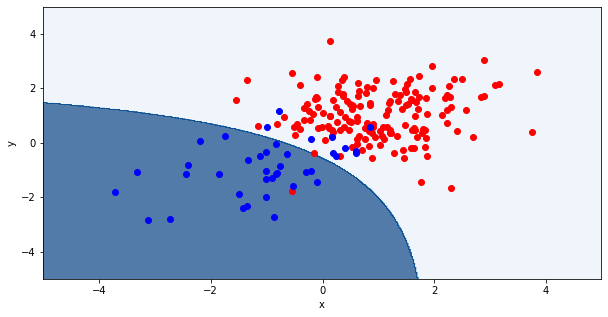

In [8]:
decision = posterior2>posterior1
fig,ax= plt.subplots(figsize=(10, 5))
plt.contourf(x, y, decision, cmap='Blues', alpha = 0.7)
plt.scatter(class1_train[:,0], class1_train[:,1], color = 'red', label = 'Class 1')
plt.scatter(class2_train[:,0], class2_train[:,1], color = 'blue', label = 'Class 2')
ax.set(xlabel= 'x', ylabel='y')
plt.show()

### Obtaining accuracy of model fromTest Data


In [9]:
test = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L3/test').to_numpy()
test_data, test_label = test[:,:2], test[:,2]

l1 = prob1*rv1.pdf(test_data)
l2 = prob2*rv2.pdf(test_data)

p1 = l1/(l1+l2)
p2 = l2/(l1+l2)

print(classification_report(test_label, p2>p1))
#Decision boundary can be obtained by  𝑃(𝐶2|𝑥)>𝑃(𝐶1|𝑥) hence test decision is p2>p1



              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.67      0.67      0.67         9

    accuracy                           0.88        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.88      0.88      0.88        49



         precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.67      0.67      0.67         9

    accuracy                           0.88        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.88      0.88      0.88        49